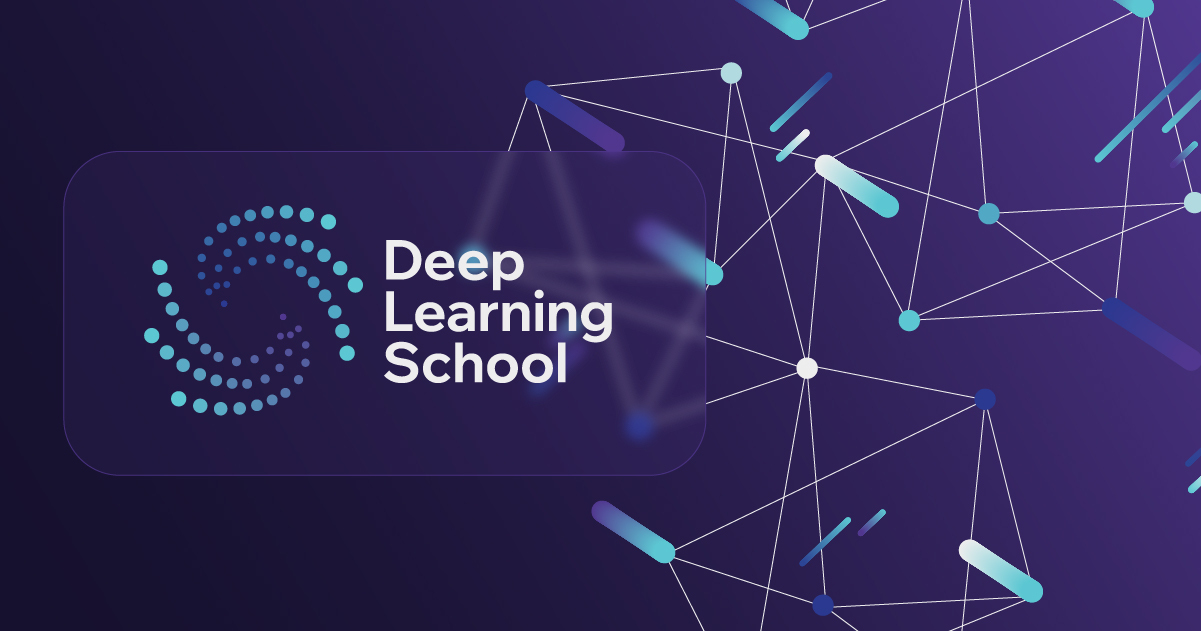

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

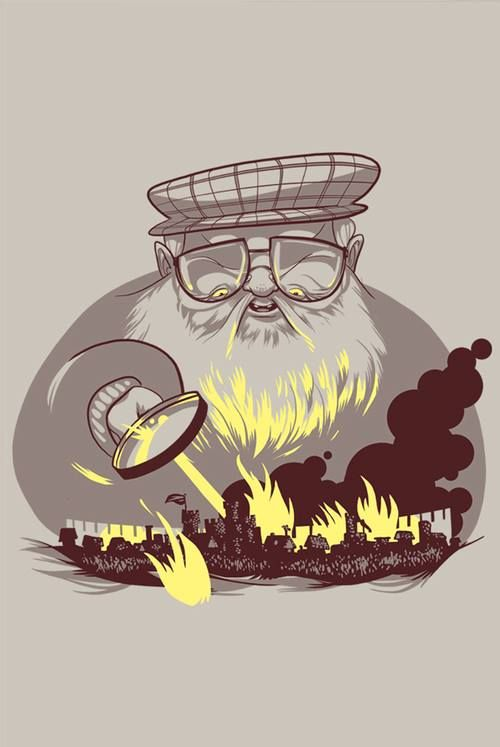

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.75$ --- 5 баллов

2) $0.75 > score \geqslant 0.65$ --- 4 балла

3) $0.65 > score \geqslant 0.55$ --- 3 балла

4) $0.55 > score \geqslant 0.50$ --- 2 балла

5) $0.50 > score \geqslant 0.45$ --- 1 балл

6) $0.45 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [370]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 51.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 76.3MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [371]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [372]:
data = pd.read_csv('/content/game_of_thrones_train.csv')
data_2 = pd.read_csv('/content/game_of_thrones_test.csv')

In [373]:
data.head()

,S.No,name,title,male,culture,dateOfBirth,mother,father,heir,house,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
0,1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
1,2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
2,3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
3,4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
4,5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [374]:
drops = ['mother','father','isAliveMother','heir','isAliveFather','isAliveHeir','isAliveSpouse','dateOfBirth','name','S.No']
data.drop(columns=drops,inplace = True)
data_2.drop(columns=drops,inplace =True)

In [375]:
data['title'] = data['title'].fillna('nobody')
data['culture'] = data['culture'].fillna('daun')
data['house'] = data['house'].fillna('daun')

data_2['title'] = data['title'].fillna('nobody')
data_2['culture'] = data['culture'].fillna('ateist')
data_2['house'] = data['house'].fillna('nocool')

In [376]:
data['spouse'] = data['spouse'].notna().astype(int)
data_2['spouse'] = data['spouse'].notna().astype(int)


In [377]:
data.loc[data['age'] < 0, 'age'] = None
data['age'] = data['age'].fillna(data['age'].mean())

data_2.loc[data_2['age'] < 0, 'age'] = None
data_2['age'] = data_2['age'].fillna(data['age'].mean())

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [378]:
data['isPopular'] = (data['popularity'] > 0.5).astype(int)
data.drop(columns = 'popularity',inplace = True)

data_2['isPopular'] = (data_2['popularity'] > 0.5).astype(int)
data_2.drop(columns = 'popularity',inplace = True)

In [379]:
data['boolDeadRelations'] = (data['numDeadRelations'] > 0).astype(int)
data.drop(columns = 'numDeadRelations',inplace = True)

data_2['boolDeadRelations'] = (data_2['numDeadRelations'] > 0).astype(int)
data_2.drop(columns = 'numDeadRelations',inplace = True)

In [380]:
data.head()

,title,male,culture,house,spouse,book1,book2,book3,book4,book5,isMarried,isNoble,age,isAlive,isPopular,boolDeadRelations
0,nobody,1,daun,daun,0,0,0,0,0,0,0,0,35.290323,0,1,1
1,Lord of the Crossing,1,Rivermen,House Frey,1,1,1,1,1,1,1,1,97.000000,1,1,1
2,Ser,1,daun,House Swyft,0,0,0,0,1,0,0,1,35.290323,1,0,0
3,Queen,0,daun,House Arryn,1,0,0,0,0,0,1,1,23.000000,0,0,0
4,Greenstone,0,Dornish,House Santagar,1,0,0,0,1,0,1,1,29.000000,1,0,0


In [381]:
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

In [382]:
for sumcults, cults in cult.items():
    data['culture'] = data['culture'].replace(cults, sumcults)
    data_2['culture'] = data_2['culture'].replace(cults, sumcults)

In [383]:
class_dict = {
    'Royalty': [
        'King-Beyond-the-Wall', 'King of Winter', 'Prince', 'Princess', 'PrincessQueen',
        'Prince of the Narrow Sea', 'Prince of WinterfellHeir to Winterfell',
        'Prince of Dragonstone', 'QueenDowager Queen', 'PrincessQueenDowager Queen',
        'LadyQueen', 'Lord of the Seven Kingdoms', 'Queen', 'King', 'LadyQueenDowager Queen',
        'King in the North', 'Prince of Dorne', 'Prince of Winterfell', 'King of the Andals',
        'King of the Iron Islands', 'Protector of the Realm', 'King of Astapor'
    ],
    'Nobility': [
        'Lord', 'Lady', 'Lord Paramount of the Trident', 'Lord Paramount of the Stormlands',
        'Lady of the Vale', 'Lady of Bear Island', 'Lord of Harrenhal', 'Lord of Oakenshield',
        'Lord of the Hornwood', 'Lord of Southshield', 'Lord of Blackhaven', 'Lord of White Harbor',
        'Lord of the Tides', 'Lord of Hammerhorn', 'LordWisdom', 'Lady of the Leaves',
        "Lord of Griffin's Roost", 'Lord Steward', 'Lord of the Crossing', 'Lord of the Iron Islands',
        'Lord of Coldmoat', 'Lord of Dragonstone', 'Lord Steward of the Iron Islands',
        'Lord Paramount of the Mander', 'Lord of Sunflower Hall', 'Lord of the Marches',
        'Lord of the Red Dunes', 'Lord Reaper of Pyke', "Lady of Torrhen's Square", 'Lord Seneschal',
        'Lord of Greyshield', 'High Steward of Highgarden', 'Lord of the Snakewood', 'Lord of Crows Nest',
        'Lord of the Deep Den', 'Lord of Darry', 'Lord of Pebbleton', 'Lord of Atranta', 'Lord of Oldcastle',
        'Lord of Flint\'s Finger', 'Master of Harlaw Hall', 'Lord of the Ten TowersLord Harlaw of HarlawHarlaw of Harlaw',
        'Lord of the Tor', 'Lord of Iron Holt', 'Lord of Honeyholt', 'Lady of Darry',
        'Lord of Kingsgrave', 'Lord of Starfall', 'Master of Deepwood Motte', 'Lord of Hellholt'
    ],
    'Military and Knights': [
        'Ser', 'Knight', 'Castellan', 'Captain-General', 'Commander of the City Watch',
        'Lord Captain of the Iron Fleet', "Lord Commander of the Night's Watch",
        'First Ranger', 'First Builder', 'Bloodrider', 'SerCastellan of Casterly Rock',
        'Master-at-Arms', 'Captain', 'Commander of the Second Sons', 'Captain of the guard',
        'Chief Undergaoler', 'Undergaoler', 'CastellanCommander'
    ],
    'Religious Figures': [
        'Septa', 'Septon', 'High Septon', 'Godswife', 'Green Grace', "Slave of R'hllor", 'Warlock',
        'Red Priest', 'Blue Grace'
    ],
    'Maesters and Scholars': [
        'Maester', 'Grand Maester', 'Seneschal', 'Magister', 'Archmaester', 'Wisdom',
        'Good Master', 'Magister of Pentos'
    ],
    'Court Officials': [
        'Hand of the King', 'Master of coin', 'Master of Whisperers', 'Master of whisperers',
        'Red Jester', 'Keeper of the Gates of the Moon', 'Steward', 'Cupbearer', 'Master of Coin',
        'master of ships', 'Mistress of whisperers', 'First Sword of Braavos', 'Tradesman-Captain'
    ],
    'Geographic Locations (titles derived from place names)': [
        'Riverrun', 'Sandship', 'Highgarden', "Storm's End", 'Arbor', 'Nightsong',
        'Horn Hill', 'Darry', 'Acorn Hall', 'Lordsport', 'Golden Storm', 'Iron Islands',
        'Brightwater', 'Sunspear', 'Old Oak', 'Black Wind', 'Blacktyde', 'Barrowton',
        'Vaith', 'Winterfell', 'Harrenhal', 'Lonely Light', 'Greywater Watch', 'Oakenshield',
        'Seagard', 'Eyrie', 'Stone Hedge', 'Hightower', 'Twins', 'Goldengrove', 'Dreadfort',
        'Casterly Rock', 'Karhold', 'Raventree Hall', 'Ruddy Hall', 'Longtable', 'Bear Island',
        'Haystack Hall', 'Old Wyk', 'the Crossing', 'the Dreadfort', 'Runestone', 'Coldmoat',
        'green lands', 'Greenstone', 'Hornwood', 'Stokeworth', 'Uplands', 'Ashford', 'Blackcrown',
        'Golden Tooth', 'Whitewalls', 'Hornvale', 'Claw Isle', 'Ironoaks', 'Bitterbridge',
        'Strongsong', 'Harridan Hill', 'Pinkmaiden', 'Cerwyn', 'Godsgrace', 'Duskendale',
        'Sharp Point', 'Grassy Vale', 'Longbow Hall', 'Hayford', 'Dyre Den', 'Skyreach',
        'Feastfires', 'Stonehelm', 'Crag', 'Gulltown', 'Sweetsister', 'Starpike', 'Sweetport Sound',
        'Felwood', 'Goldgrass', 'Redfort', 'Tower of Glimmering', 'Karl\'s Hold', 'Blackmont',
        "Widow's Watch", 'Castle Lychester', "Heart's Home", 'Volmark', 'Greenshield',
        'Shatterstone', 'Ghost Hill', 'Yronwood', 'Banefort', 'Sandstone', 'Wyndhall', 'Rills',
        'Longsister', 'Cobblecat', 'Coldwater Burn', 'Fair Isle', "Rook's Rest", 'Crakehall',
        'Deepwood Motte', 'Kayce', 'Ten Towers', 'Three Towers', 'Salt Shore', 'Sealskin Point',
        'Three Sisters', 'Grey Glen', 'Dragonstone', 'Eastwatch-by-the-Sea', 'Foamdrinker', 'Red Flower Vale',
        'Rain House'
    ],
    'Tribal and Cultural Leaders': [
        'Magnar of Thenn', 'Khal', 'The NorreyLord Norrey', 'Andals', 'nobody', '[1]', 'Harlaw',
        'red hand', 'Khalakka', 'Wind Witch', 'Big BucketThe Wull', 'Wraith', 'Oarmaster', 'Light of the West'
    ],
    'Commoners and Minor Titles': ['Brother', 'Goodman', 'Goodwife', 'BrotherProctor', 'Lady Marya']
}


In [384]:
for titul, tituls in class_dict.items():
    data['title'] = data['title'].replace(tituls, titul)
    data_2['title'] = data_2['title'].replace(tituls, titul)

In [389]:
houses_dict = {
    'Great Houses': [
        'House Stark', 'House Lannister', 'House Baratheon', 'House Targaryen',
        'House Greyjoy', 'House Martell', 'House Tyrell', 'House Arryn', 'House Tully',
        'House Lannister of Casterly Rock', 'House Baratheon of Dragonstone',
        "House Baratheon of King's Landing"
    ],

    'Notable Houses': [
        'House Bolton', 'House Frey', 'House Hightower', 'House Florent', 'House Manderly',
        'House Karstark', 'House Velaryon', 'House Redwyne', 'House Royce', 'House Reed',
        'House Dayne', 'House Clegane', 'House Blackfyre', 'House Fossoway', 'House Mormont',
        'House Umber', 'House Yronwood', 'House Blackwood', 'House Tarly', 'House Fossoway of Cider Hall',
        'House Mallister', 'House Westerling', 'House Swann', 'House Whent', 'House Seaworth',
        'House Oakheart', 'House Piper', 'House Estermont', 'House Darry', 'House Qorgyle',
        'House Goodbrother', 'House Lefford', 'House Crakehall', 'House Bracken', 'House Santagar',
        'House Reyne', 'House Frey of Riverrun', 'House Tarth'
    ],

    'Minor Houses': [
        'House Wylde', 'House Connington', 'House Ambrose', 'House Brax', 'House Bulwer', 'House Caron',
        'House Caswell', 'House Celtigar', 'House Cerwyn', 'House Charlton', 'House Corbray',
        'House Costayne', 'House Cox', 'House Crane', 'House Dondarrion', 'House Drumm', 'House Fell',
        'House Glover', 'House Hornwood', 'House Hunt', 'House Kenning of Kayce', 'House Locke',
        'House Lorch', 'House Lynderly', 'House Mooton', 'House Norrey', 'House Payne', 'House Peake',
        'House Penrose', 'House Redfort', 'House Rosby', 'House Rowan', 'House Ryswell', 'House Slynt',
        'House Smallwood', 'House Sparr', 'House Staunton', 'House Sunglass', 'House Tallhart',
        'House Tawney', 'House Vance', 'House Vypren', 'House Waynwood', 'House Webber', 'House Wode',
        'House Harlaw', 'House Baelish', 'House Morrigen', 'House Grafton', 'House Serry'
    ],

    'Other Small Houses': [
        'House Blacktyde', 'House Butterwell', 'House Byrch', 'House Cockshaw', 'House Codd', 'House Cupps',
        'House Darklyn', 'House Farring', 'House Farrow', 'House Farwynd', 'House Goodbrook',
        'House Goodbrother of Shatterstone', 'House Grandison', 'House Grimm', 'House Haigh',
        'House Hardyng', 'House Harclay', 'House Hawick', 'House Hewett', 'House Hollard', 'House Inchfield',
        'House Ironmaker', 'House Jordayne', 'House Jast', 'House Kettleblack', 'House Leygood',
        'House Lonmouth', 'House Longthorpe', 'House Mallery', 'House Manwoody', 'House Meadows',
        'House Merlyn', 'House Moreland', 'House Mullendore', 'House Paege', 'House Plumm',
        'House Poole', 'House Prester', 'House Rambton', 'House Risley', 'House Roote', 'House Ryger',
        'House Selmy', 'House Shett of Gull Tower', 'House Spicer', 'House Stonetree', 'House Stout',
        'House Stokeworth', 'House Strong', 'House Sunderland', 'House Toland', 'House Tollett',
        'House Turnberry', 'House Uller', 'House Wells', 'House Wythers', 'House Yew', 'House Hardy',
        'House Swyft', 'House Varner', 'House Beesbury', 'House Cafferen', 'House Buckler', 'House Lothston',
        'House Boggs', 'House Blackmont', 'House Wynch', 'House Staedmon', 'House Graceford',
        'House Stackspear', 'House Belmore', 'House Cassel', 'House Cuy', 'House Vaith', 'House Marbrand',
        'House Allyrion', 'House Bar Emmon', 'House Norridge', 'House Hunter', 'House Hayford',
        'House Fowler', 'House Greenfield', 'House Gower', 'House Borrell', 'House Lydden', 'House Volmark',
        'House Sarsfield', 'House Foote', 'House Chelsted', 'House Banefort', 'House Ball', 'House Ruttiger',
        'House Estren', 'House Rykker', 'House Longwaters', 'House Thorne', 'House Flint', 'House Coldwater',
        'House Farman', 'House Templeton', 'House Mudd', 'House Nymeros Martell', 'House Vance of Atranta',
        "House Vance of Wayfarer's Rest", 'House Penny', 'House Crabb', 'House Ashford', 'House Royce of the Gates of the Moon',
        'House Botley', 'House Nayland', 'House Conklyn', 'House Deddings', 'House Norcross', 'House Woods',
        'House Kenning of Harlaw', 'House Broom', 'House Brune of Brownhollow', 'House Brune of the Dyre Den',
        'House Mollen', 'House Hoare', 'House Wull', 'House Wagstaff', 'House Vyrwel', 'House of Pahl',
        'House Blackbar', 'House of Merreq', 'House Harlaw of Harlaw Hall', 'House Lannister of Lannisport',
        'House Fossoway of New Barrel', 'House Osgrey', 'House Farwynd of the Lonely Light',
        'House Weaver', 'House Heddle', 'House Sharp', 'House Dalt', 'House Bushy', 'House Greenhill',
        'House Willum', 'House of Galare', 'House Gaunt', 'House Sawyer', 'House Uffering', 'House Bolling',
        'House Clifton', 'House Blackberry', 'House Mertyns', 'House Pemford', 'House Shepherd', 'House of Ghazeen',
        'House Harlaw of Harridan Hill', 'House Harlaw of the Tower of Glimmering', 'House Bettley',
        'House Myre', 'House Woolfield', 'House Chyttering', "House Flint of Widow's Watch", 'House Lychester',
        'House Vikary', 'House Chester', 'House Hogg', 'House Leek', 'House Toyne', 'House Liddle',
        'House Gargalen', 'House Hetherspoon', 'House Wayn', 'House Blanetree', 'House Blount',
        'House Suggs', 'House Drinkwater', 'House Harlaw of Grey Garden', 'House Condon', 'House Moore'
    ],

    'Organizations and Groups': [
        "Night's Watch", 'Brotherhood Without Banners', 'Kingsguard', 'Golden Company', 'Maesters',
        'Citadel', 'Faceless Men', 'Stormcrows', 'Second Sons', 'Khal', 'Kingswood Brotherhood',
        'Burned Men', 'Antler Men', 'Stone Crows', 'Sea watch', 'Moon Brothers', 'Brave Companions',
        'Band of Nine', "Alchemists' Guild", 'Black Ears', 'Faith of the Seven', 'Pureborn', "R'hllor",
        'Brotherhood without banners', 'Windblown', 'Queensguard', "City Watch of King's Landing",
        'Wise Masters', 'Good Masters', 'The Citadel', 'Iron Bank of Braavos', 'Company of the Cat',
        'Summer Islands'
    ],

    'Unknown or Minor Entities': ['daun', 'Happy Port', 'Peach', 'House Humble', 'House of Loraq', 'Blacks', 'wildling', 'Drowned men', 'Kingdom of the Three Daughters', "Chataya's brothel"]
}


In [390]:
for house, houses in houses_dict.items():
    data['house'] = data['house'].replace(houses, house)
    data_2['house'] = data_2['house'].replace(houses, house)

In [391]:
data['house'].unique()

array(['Unknown or Minor Entities', 'Notable Houses',
       'Other Small Houses', 'Great Houses', 'Organizations and Groups',
       'Minor Houses'], dtype=object)

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

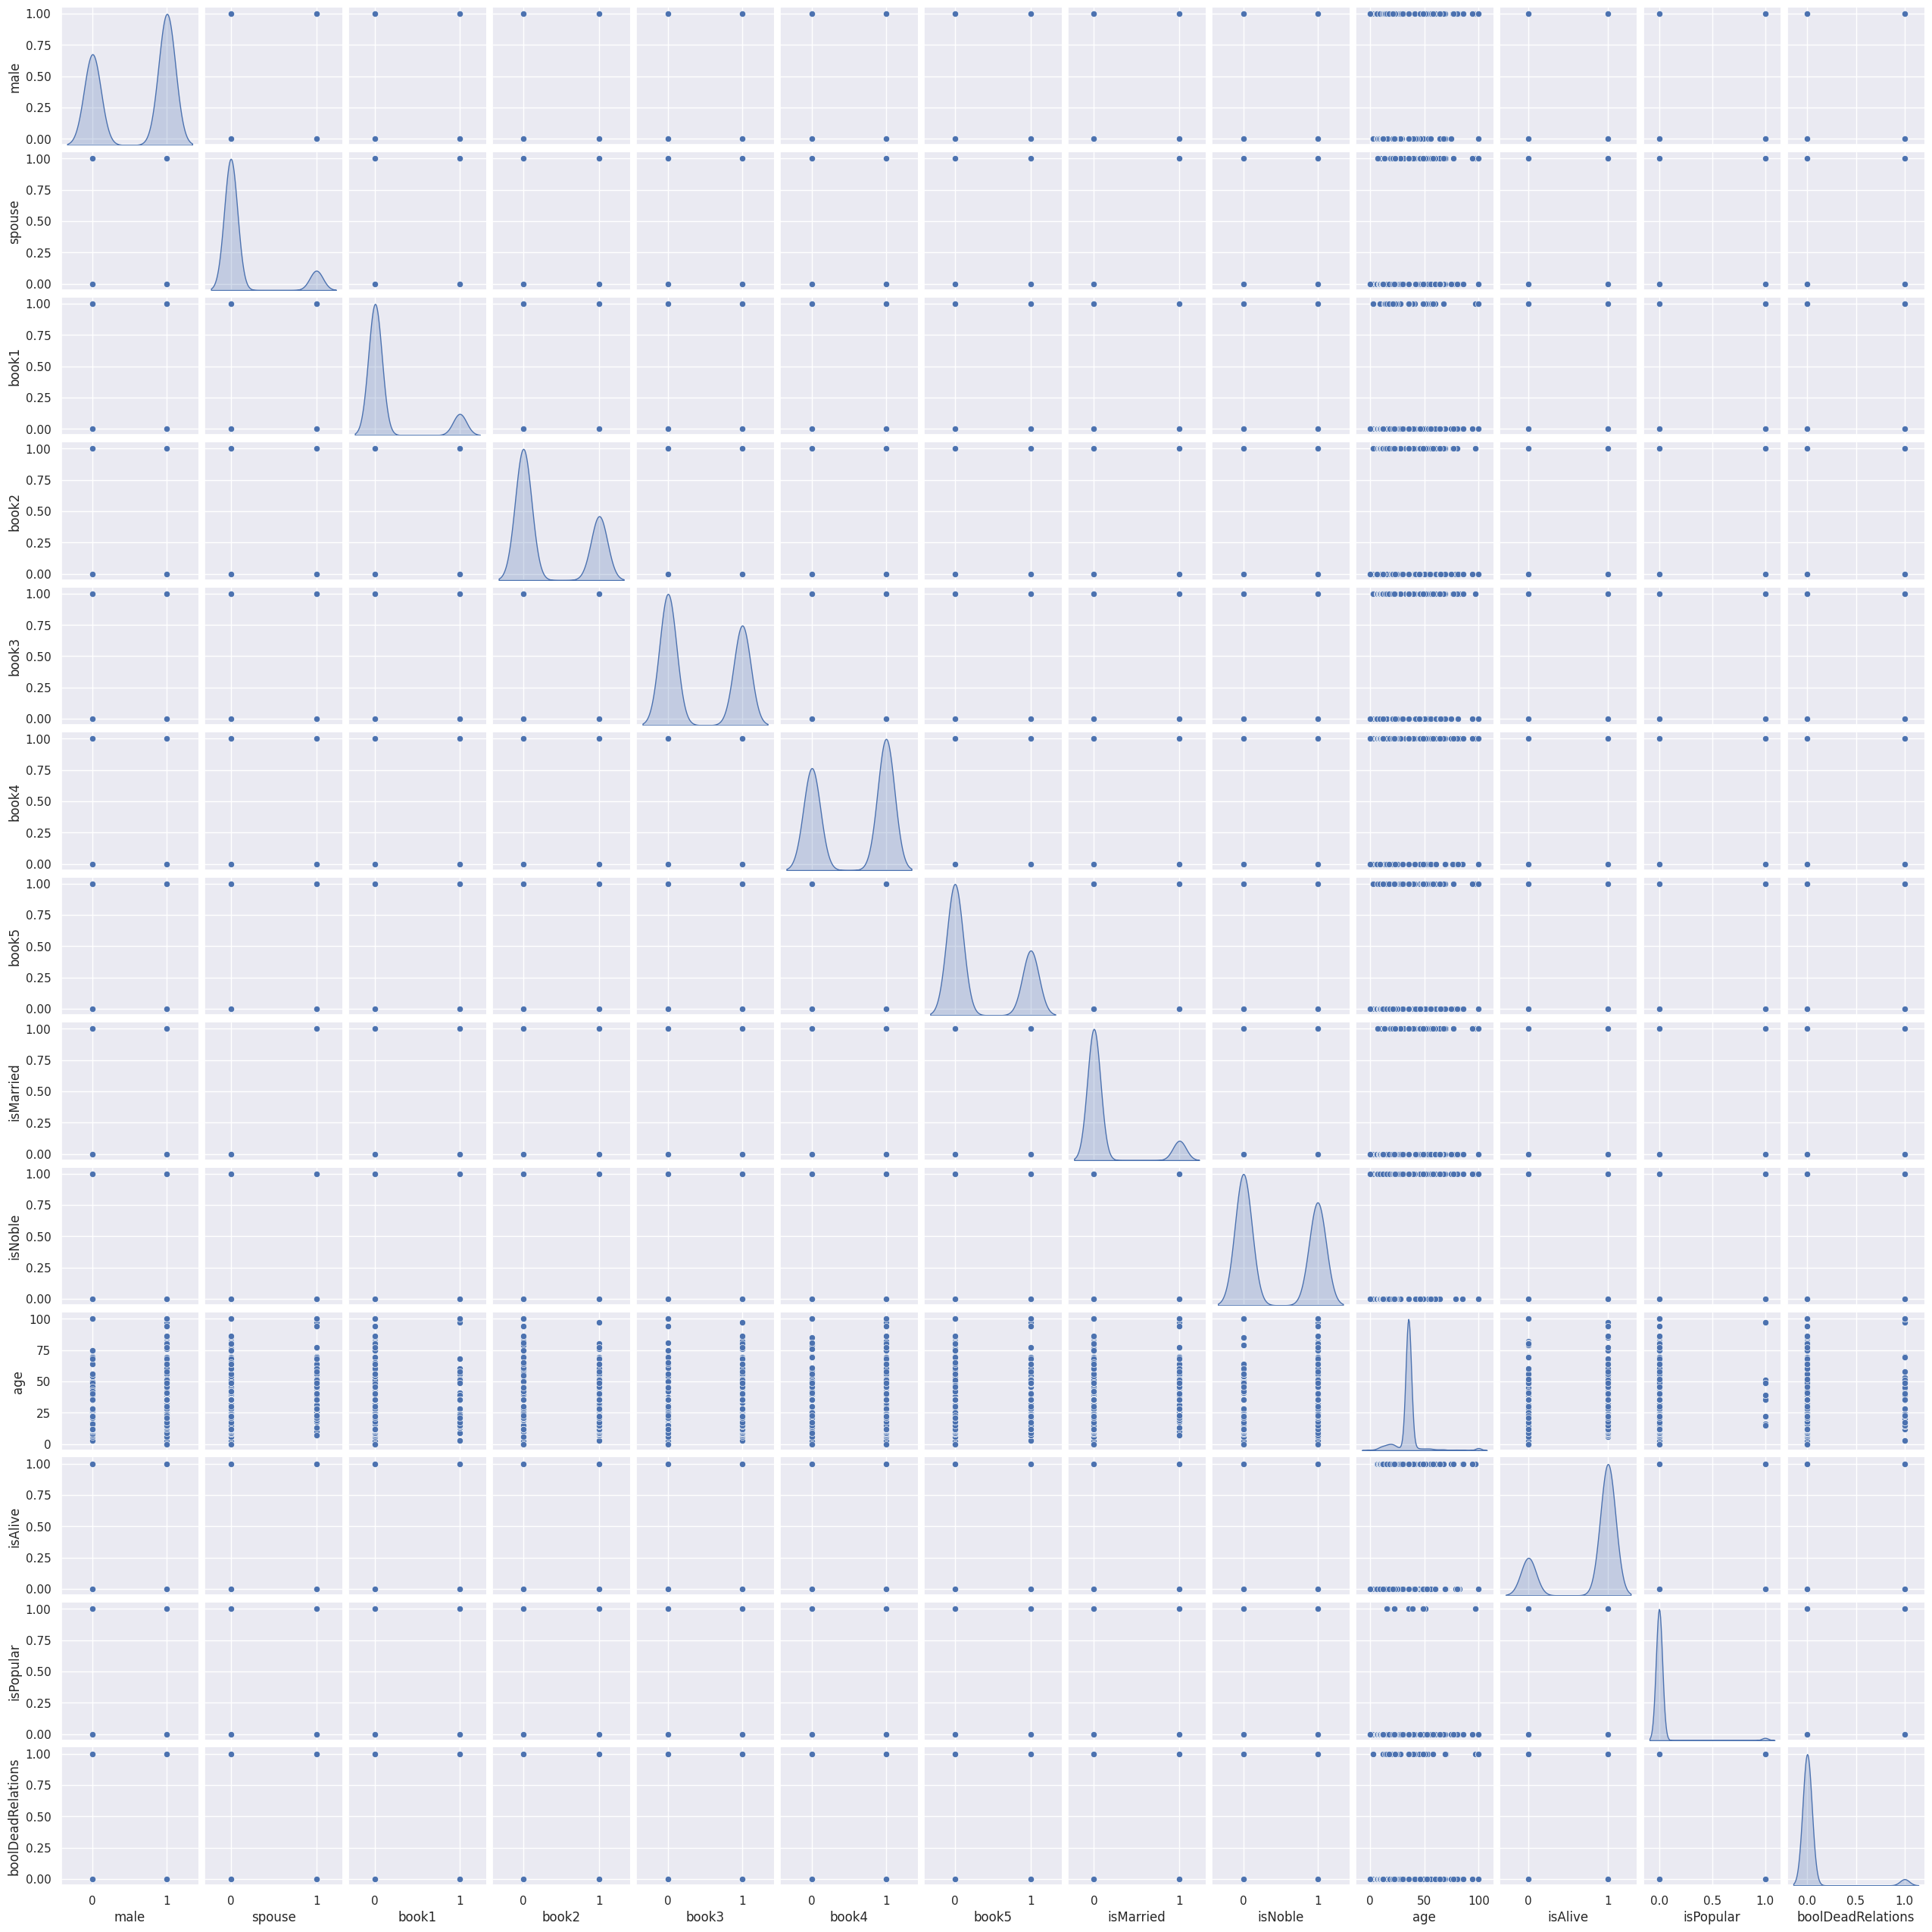

In [361]:
sns.set()
sns.pairplot(data, height = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

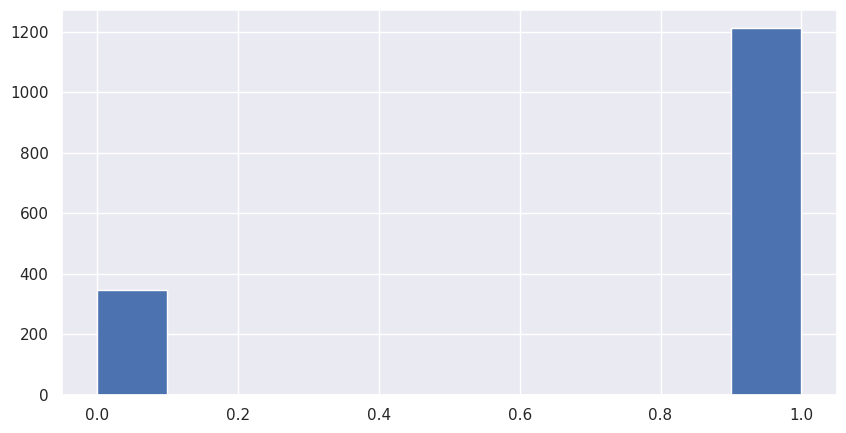

In [362]:
plt.figure(figsize = (10, 5))
data['isAlive'].hist()
plt.show()

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [392]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['title', 'culture', 'house']

# Для каждого столбца свой кодировщик:
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    data_2[column] = le.transform(data_2[column])


In [393]:
data['title'].unique()

array([19, 10,  9, 14,  3,  2,  7, 17,  1, 11, 13, 12,  6,  0, 15,  4, 16,
        5, 18,  8])

In [394]:
data.head(10)

,title,male,culture,house,spouse,book1,book2,book3,book4,book5,isMarried,isNoble,age,isAlive,isPopular,boolDeadRelations
0,19,1,47,5,0,0,0,0,0,0,0,0,35.290323,0,1,1
1,10,1,31,2,1,1,1,1,1,1,1,1,97.000000,1,1,1
2,9,1,47,4,0,0,0,0,1,0,0,1,35.290323,1,0,0
3,14,0,47,0,1,0,0,0,0,0,1,1,23.000000,0,0,0
4,3,0,7,2,1,0,0,0,1,0,1,1,29.000000,1,0,0
5,19,1,47,5,0,0,0,0,0,0,0,0,35.290323,1,1,1
6,2,1,41,0,1,0,0,0,0,0,1,1,26.000000,0,0,0
7,19,1,47,5,0,0,0,0,0,0,0,0,35.290323,0,1,1
8,9,1,47,5,0,0,0,1,0,0,0,1,35.290323,0,0,0
9,9,1,47,4,0,0,0,0,0,0,0,1,35.290323,1,0,0


**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

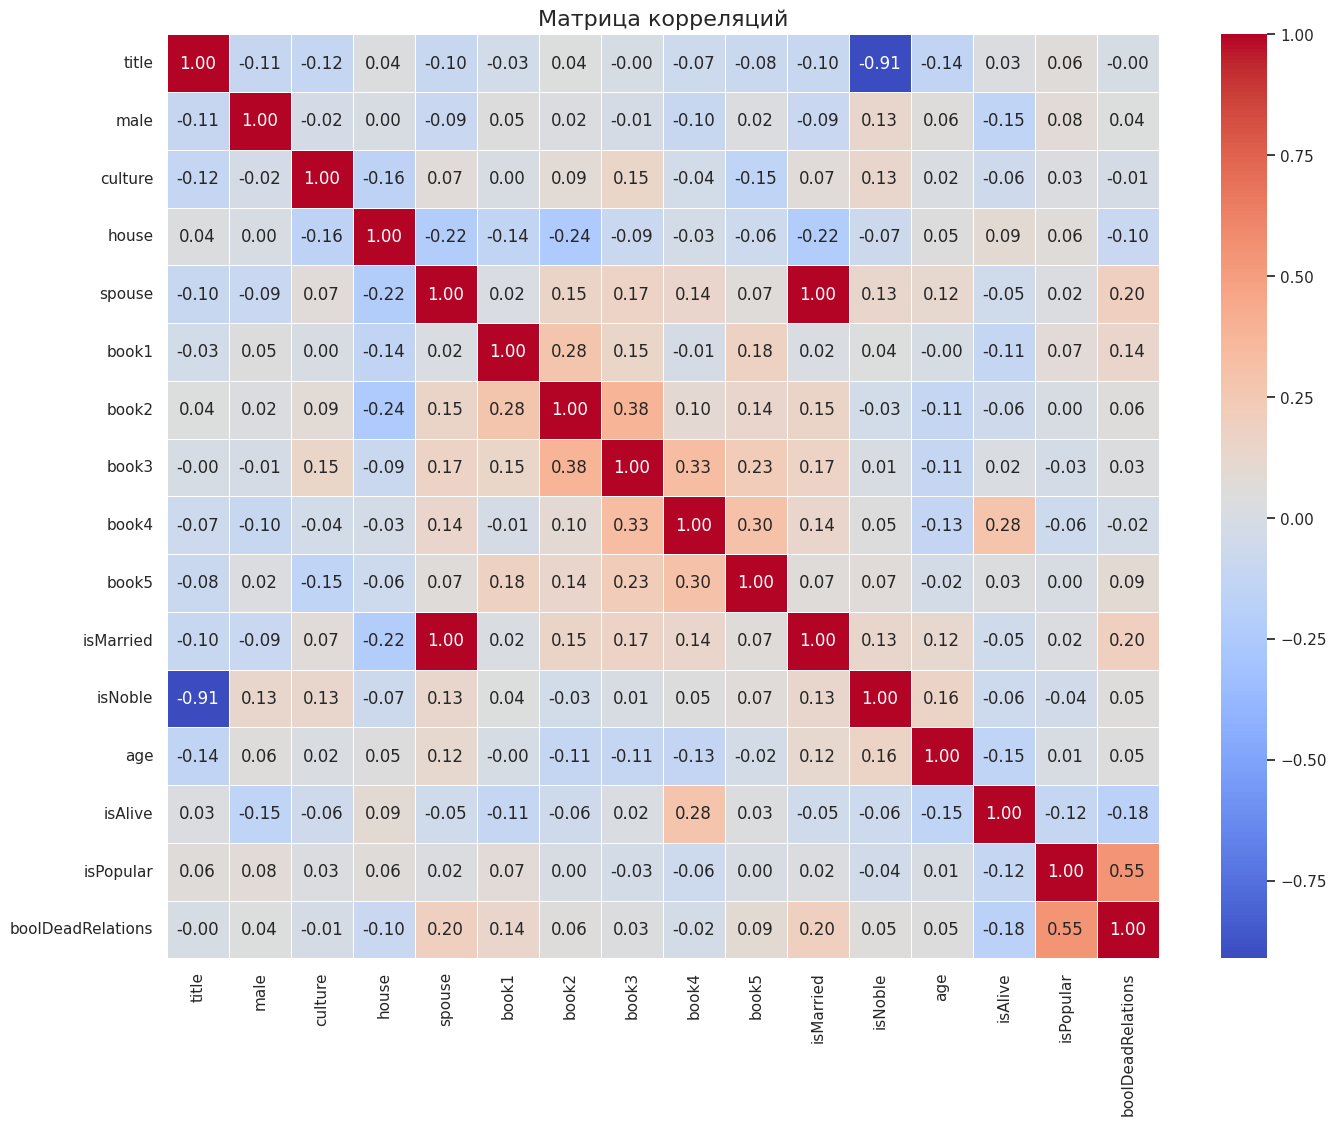

In [395]:
plt.figure(figsize=(16, 12))  # ← вот это можно менять
corr = data.corr(numeric_only=True)

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Матрица корреляций', fontsize=16)
plt.show()


In [396]:
data_2.drop(columns = ['spouse','isNoble'], inplace = True)
data.drop(columns = ['spouse','isNoble'], inplace = True)

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [397]:
X = data.drop(columns = 'isAlive').values
y = data['isAlive'].values

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [398]:
from sklearn.model_selection import train_test_split

In [408]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=True, random_state = 42)

In [400]:
data.head()

,title,male,culture,house,book1,book2,book3,book4,book5,isMarried,age,isAlive,isPopular,boolDeadRelations
0,19,1,47,5,0,0,0,0,0,0,35.290323,0,1,1
1,10,1,31,2,1,1,1,1,1,1,97.000000,1,1,1
2,9,1,47,4,0,0,0,1,0,0,35.290323,1,0,0
3,14,0,47,0,0,0,0,0,0,1,23.000000,0,0,0
4,3,0,7,2,0,0,0,1,0,1,29.000000,1,0,0


In [409]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_val)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [402]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [403]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [405]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 1. создание модели
ada_boost_classifier = AdaBoostClassifier(n_estimators=100, random_state=42)

# Шаг 2. обучение модели

ada_boost_classifier.fit(X_train, y_train)
# Шаг 1. создание модели
random_forest_classifier = RandomForestClassifier(random_state = 42)

# Шаг 2. обучение модели

random_forest_classifier.fit(X_train, y_train)
# Шаг 1. создание модели
gaussian_process_classifier = GaussianProcessClassifier(random_state = 42)

# Шаг 2. обучение модели

gaussian_process_classifier.fit(X_train, y_train)
# Шаг 1. создание модели
gaussian_nb = GaussianNB()

# Шаг 2. обучение модели
gaussian_nb.fit(X_train, y_train)
# Шаг 1. создание модели
knn = KNeighborsClassifier()

# Шаг 2. обучение модели
knn.fit(X_train, y_train)
# Шаг 1. создание модели
svc = SVC()

# Шаг 2. обучение модели
svc.fit(X_train, y_train)
# Шаг 1. создание модели
decision_tree_classifier = DecisionTreeClassifier()

# Шаг 2. обучение модели
decision_tree_classifier.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DecisionTreeClassifier()

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [406]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [410]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_val)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"logistic regression accuracy {accuracy:.6f}")
# Шаг 3. Предсказание на тестовых данных
y_pred = ada_boost_classifier.predict(X_val)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"ada boost classifier accuracy {accuracy:.6f}")
# Шаг 3. Предсказание на тестовых данных
y_pred = random_forest_classifier.predict(X_val)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Random forest classifier accuracy {accuracy:.6f}")
# Шаг 3. Предсказание на тестовых данных
y_pred = gaussian_process_classifier.predict(X_val)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"gaussian process classifier accuracy {accuracy:.6f}")
# Шаг 3. Предсказание на тестовых данных
y_pred = gaussian_nb.predict(X_val)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"gaussian nb accuracy {accuracy:.6f}")
# Шаг 3. Предсказание на тестовых данных
y_pred = knn.predict(X_val)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"knn classifier accuracy {accuracy:.6f}")
# Шаг 3. Предсказание на тестовых данных
y_pred = svc.predict(X_val)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"svc accuracy {accuracy:.6f}")
# Шаг 3. Предсказание на тестовых данных
y_pred = decision_tree_classifier.predict(X_val)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"decision tree classifier accuracy {accuracy:.6f}")

logistic regression accuracy 0.782051
ada boost classifier accuracy 0.772436
Random forest classifier accuracy 0.875000
gaussian process classifier accuracy 0.842949
gaussian nb accuracy 0.756410
knn classifier accuracy 0.826923
svc accuracy 0.769231
decision tree classifier accuracy 0.852564


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [ ]:
# Шаг 3. Предсказание на тестовых данных


# Шаг 4. Оценка предсказания по метрике accuracy

print("Accuracy : %.4f" % accuracy)

Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [ ]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 9.42MB/s]


In [ ]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [ ]:
submission

,isAlive
S.No,
1558,0
1559,0
1560,0
1561,0
1562,0
...,...
1942,0
1943,0
1944,0


Как сохранить измененный Pandas DataFrame в csv файл:

In [ ]:
submission.to_csv("/content/new_submission.csv", index=False)